# Breast Cancer Prediction using Linear Regression

The goal of this project is to build a Linear Regression model, evaluate it using cross-validation, and analyze its performance.

### 1. Import Libraries
The following libraries are used in this project:
- **numpy** → for numerical computations  
- **pandas** → for handling tabular data  
- **matplotlib & seaborn** → for visualization  
- **scikit-learn** → for dataset, preprocessing, model training, and evaluation  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Load Dataset
- The dataset is loaded from `sklearn.datasets` using `load_breast_cancer()`.  
- It contains **569 samples** and **30 numerical features** describing breast cancer tumors.  
- Target variable (`y`) → `0 = malignant`, `1 = benign`.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df=load_breast_cancer()

In [4]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

### 3. Convert to DataFrame
- The dataset is converted into a Pandas DataFrame for better readability.  
- Feature names from the dataset are assigned as column names.  

In [5]:
dataset=pd.DataFrame(df.data)

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
dataset.columns=df.feature_names

In [8]:
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 4. Split Features and Target
- **X (features):** The 30 tumor characteristics.  
- **y (target):** The diagnosis (malignant/benign). 

In [9]:
# Independent features and dependent features
x=dataset
y=df.target

### 5. Train-Test Split
- The dataset is split into:
  - **80% Training Data**
  - **20% Testing Data**  
- `random_state=42` is used for reproducibility (ensures same split every time).

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


### 6. Feature Scaling
- Linear Regression is sensitive to feature scales.  
- **StandardScaler** is applied:
  - Mean = 0  
  - Standard Deviation = 1  
- Both training and testing data are scaled.  

In [12]:
#Standardization the dataset
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

### 7. Train Linear Regression Model
- A **Linear Regression** model is created and trained using training data (`x_train`, `y_train`).  

In [14]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### 8. Cross Validation
- **10-Fold Cross Validation** is applied.  
- Metric: **Negative Mean Squared Error (MSE)**  
- The mean MSE gives an overall estimate of model performance. 

In [15]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [16]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
mse=cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [18]:
np.mean(mse)

-0.0659645518947479

### 9. Predictions
- The trained model predicts the values on the **test dataset**.  
- Residuals (difference between actual and predicted values) are plotted using a distribution plot. 

In [19]:
# Prediction
reg_pred=regression.predict(x_test)

In [20]:
reg_pred

array([ 0.62168355,  0.17803853,  0.27512068,  1.1320503 ,  1.11698318,
       -0.66303713, -0.07355607,  0.44212355,  0.28085763,  0.96360261,
        0.794142  ,  0.33192584,  0.90481757,  0.39666504,  0.9336697 ,
        0.17750175,  0.91013271,  1.19445658,  1.41615414,  0.04464718,
        0.65041677,  0.8752756 , -0.38792384,  1.08061015,  0.96215276,
        0.84678947,  0.99807141,  0.87049439,  0.94386257, -0.16893149,
        1.0238613 ,  1.04190872,  0.81604445,  0.9156589 ,  1.07186427,
        0.84289045,  0.48746626,  0.62375262,  0.25368547,  0.76842229,
        1.15259719,  0.03799193,  0.97126513,  0.99773732,  0.55160057,
        0.65587474,  0.91828081,  1.02580964,  0.80527854,  1.01543748,
        0.20974453, -0.07875586,  0.55842968,  0.59037896,  1.02323689,
        0.78572959,  0.93959678, -0.36416183,  0.55847881,  1.04937824,
        0.94406266, -0.1953921 , -0.35465216,  0.80776979,  0.90208492,
        0.58309865, -0.16982229, -0.15422403,  0.97877451,  0.83

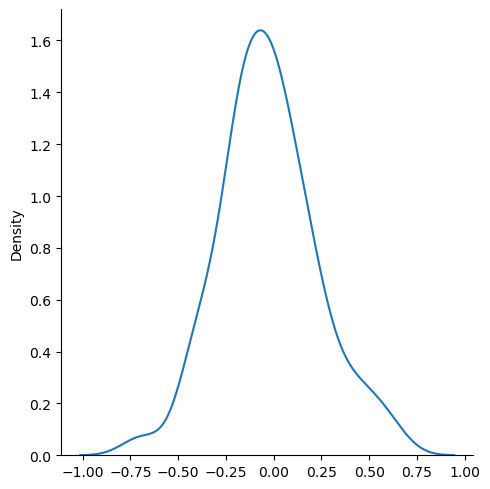

In [21]:
sns.displot(reg_pred-y_test, kind='kde')

### 10. Evaluation using R² Score
- **R² Score** is calculated to evaluate model performance.  
- Interpretation:
  - **R² = 1:** Perfect predictions  
  - **R² = 0:** Model does not explain any variance  
  - **R² < 0:** Model is worse than a baseline mean predictor  

In [22]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)

In [23]:
print("R2 Score:",score)

R2 Score: 0.7271016126223553


### 11. Conclusion
- Linear Regression provides a **baseline model** for this dataset.  
- Since the target variable is categorical (classification problem), **Logistic Regression or classification models** would be more appropriate.  
- This project demonstrates the complete ML workflow:
  1. Data Loading  
  2. Preprocessing  
  3. Model Training  
  4. Cross Validation  
  5. Evaluation & Visualization  

## Future Improvements
- Try **Logistic Regression** for better classification performance.  
- Experiment with **SVM, Random Forest, and Gradient Boosting**.  
- Add more **visualizations** for feature importance and correlations.  

---

## Files in this Repository
- `BreastCancer_LinearRegression.ipynb` → Jupyter Notebook with code + explanations  
- `README.md` → Project documentation  